<a href="https://colab.research.google.com/github/ShirsaM/Kaggle_Applied_Projects-Data-Science/blob/main/ML_Hackathon_by_Analytics_Vidhya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Demand Forecasting
### - using Machine Learning prediction

**Objective:-** Can we forecast the demand of the car rentals on an hourly basis?

The main objective of the problem is to develop the machine learning approach to forecast the demand of car rentals on an hourly basis.

**Problem Statement:-** ABC is a car rental company based out of Bangalore. It rents cars for both in and out stations at affordable prices. The users can rent different types of cars like Sedans, Hatchbacks, SUVs and MUVs, Minivans and so on.

In recent times, the demand for cars is on the rise. As a result, the company would like to tackle the problem of supply and demand. The ultimate goal of the company is to strike the balance between the supply and demand inorder to meet the user expectations. 

The company has hired you as a Data Scientist to predict the demand of car rentals on an hourly basis based on the past data, which the company has collected from each rental.



---



**Lets import the required libraries as first step**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error 

In [ ]:
df = pd.read_csv('/content/train_E1GspfA.csv')
df.head()

,date,hour,demand
0,2018-08-18,9,91
1,2018-08-18,10,21
2,2018-08-18,13,23
3,2018-08-18,14,104
4,2018-08-18,15,81


## Data Investigation

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18247 entries, 0 to 18246
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    18247 non-null  object
 1   hour    18247 non-null  int64 
 2   demand  18247 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 427.8+ KB


We find that there are no null entries in the data and also we get the dimensions od the data along with data types of each column. The 'date' column is of object type so let's change it to datetime object.

In [ ]:
# Let's convert the 'date' column to datetime object

df['date'] = pd.to_datetime(df['date'])
df.dtypes

date      datetime64[ns]
hour               int64
demand             int64
dtype: object

In [ ]:
df.head()

,date,hour,demand
0,2018-08-18,9,91
1,2018-08-18,10,21
2,2018-08-18,13,23
3,2018-08-18,14,104
4,2018-08-18,15,81


## Data Pre-processing and EDA

In [ ]:
# We find the total demand of rentals at every hour

df['hour'].value_counts()

16    892
15    890
13    889
17    889
12    888
14    886
18    884
10    884
11    883
9     878
19    878
8     870
20    864
21    858
22    837
7     806
23    776
0     726
6     679
1     587
2     553
5     338
4     325
3     287
Name: hour, dtype: int64

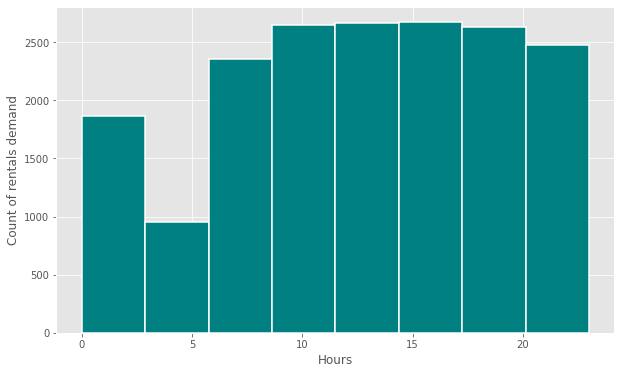

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(10,6))
bins = np.linspace(df.hour.min(), df.hour.max(), 9)
df['hour'].hist(color='teal' , edgecolor='white' , linewidth=1.5, bins=bins)
plt.xlabel('Hours')
plt.ylabel('Count of rentals demand')
plt.show()

**We can observe that ranging from 9am to 8pm the demand for car rentals were more than other time of the day.**

In [ ]:
df['month']= df['date'].dt.month
df.head()

,date,hour,demand,month
0,2018-08-18,9,91,8
1,2018-08-18,10,21,8
2,2018-08-18,13,23,8
3,2018-08-18,14,104,8
4,2018-08-18,15,81,8


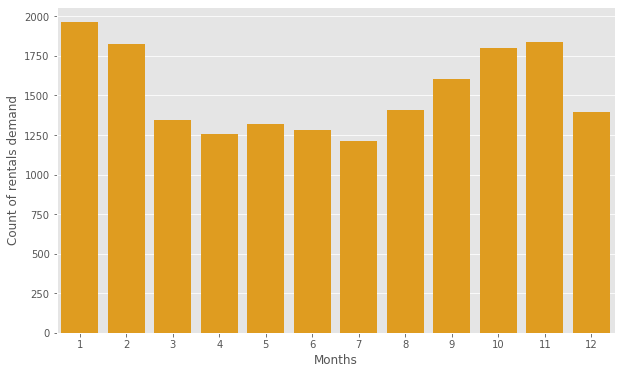

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x=df['month'] , data=df , color='orange')
plt.xlabel('Months')
plt.ylabel('Count of rentals demand')
plt.show()

**Here we observe that in the month January the demand for car rentals were very high, followed by November, February and others.**

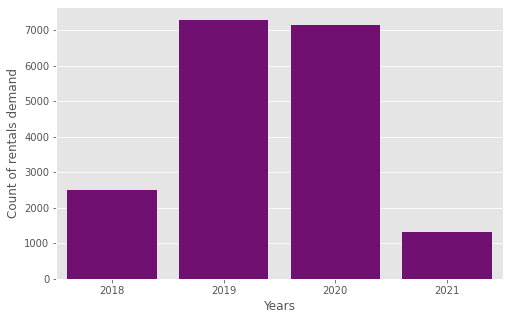

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x=df['date'].dt.year , data=df , color='purple')
plt.xlabel('Years')
plt.ylabel('Count of rentals demand')
plt.show()

**Here we observe that in the 2019 the demand for car rentals was very high than the remaining years.**

## Feature selection for Prediction using train dataset

In [ ]:
X = df[['hour', 'month']]
y = df[['demand']].values

In [ ]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.55230719,  0.42278557],
       [-0.39951376,  0.42278557],
       [ 0.05886655,  0.42278557],
       [ 0.21165998,  0.42278557],
       [ 0.36445341,  0.42278557]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.4192, random_state=2)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(10597, 2)
(7650, 2)
(10597, 1)
(7650, 1)


**Logistic Regression model**

In [ ]:
lr= LogisticRegression()
lr.fit(X_train,y_train)
yhat=lr.predict(X_test)

err = mean_squared_error(y_test , yhat)
print('Mean squared error of the model is= ', err)
print('Root Mean squared error of the model is= ', sqrt(err))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean squared error of the model is=  2081.630588235294
Root Mean squared error of the model is=  45.62489000792543


**Support Vector Machine model**

In [ ]:
svm= SVC()
svm.fit(X_train,y_train)
yhat=svm.predict(X_test)

err2 = mean_squared_error(yhat , y_test)
print('Mean squared error of the model is= ', err2)
print('Root Mean squared error of the model is= ', sqrt(err2))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean squared error of the model is=  1791.8809150326797
Root Mean squared error of the model is=  42.330614394698785


**Decision Tree Model**

In [ ]:
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)
yhat=tree.predict(X_test)

err3 = mean_squared_error(yhat , y_test)
print('Mean squared error of the model is= ', err3)
print('Root Mean squared error of the model is= ', sqrt(err3))

Mean squared error of the model is=  2629.5895424836604
Root Mean squared error of the model is=  51.279523617947746


**K-Nearest Neighbors Model**

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

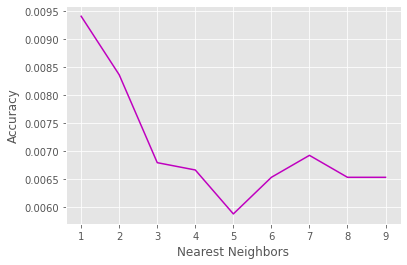

In [ ]:
from sklearn import metrics

Ks = 10
mean_acc = np.zeros((Ks-1))

for n in range(1,Ks): 
    knn = KNeighborsClassifier(n_neighbors = n).fit(X_train , y_train)
    
    yhat = knn.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test , yhat)

plt.plot(range(1,Ks) , mean_acc,'m')
plt.xlabel("Nearest Neighbors")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
# Modeling-------------->
k = 2
knn = KNeighborsClassifier(n_neighbors = k).fit(X_train , y_train)

# Prediction------------>
yhat = knn.predict(X_test)

err4 = mean_squared_error(yhat , y_test)
print('Mean squared error of the model is= ', err4)
print('Root Mean squared error of the model is= ', sqrt(err4))

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Mean squared error of the model is=  2515.881699346405
Root Mean squared error of the model is=  50.158565563086086


**We observe that model SVM has the least RSME. Hence, for model evaluation on test data we will use the SVM model**

## Loading Test dataset for model evaluation

In [ ]:
test_df = pd.read_csv('/content/test_6QvDdzb.csv')
test_df.head()

,date,hour
0,2021-03-01,0
1,2021-03-01,1
2,2021-03-01,2
3,2021-03-01,3
4,2021-03-01,5


Following the similar procedure on test data like the previous train data

In [ ]:
test_df['date']= pd.to_datetime(test_df['date'])
test_df.dtypes

date    datetime64[ns]
hour             int64
dtype: object

In [ ]:
test_df['month']= test_df['date'].dt.month
test_df.head()

,date,hour,month
0,2021-03-01,0,3
1,2021-03-01,1,3
2,2021-03-01,2,3
3,2021-03-01,3,3
4,2021-03-01,5,3


In [ ]:
X_new = test_df[['hour', 'month']]
X_new[0:5]

,hour,month
0,0,3
1,1,3
2,2,3
3,3,3
4,5,3


In [ ]:
X_new.shape

(7650, 2)

In [ ]:
X_new = preprocessing.StandardScaler().fit(X_new).transform(X_new)

In [ ]:
yhat_new=svm.predict(X_new)

err5 = mean_squared_error(yhat_new , y_test)
print('Mean squared error of the model is= ', err5)
print('Root Mean squared error of the model is= ', sqrt(err5))

Mean squared error of the model is=  1956.2777777777778
Root Mean squared error of the model is=  44.229829049836695


**Now lets add the predicted y values to the test dataset by adding to a new column 'demand'.**

In [ ]:
test_df.head()

,date,hour,month
0,2021-03-01,0,3
1,2021-03-01,1,3
2,2021-03-01,2,3
3,2021-03-01,3,3
4,2021-03-01,5,3


In [ ]:
yhat_new[0:5]

array([76, 76, 76, 76, 93])

In [ ]:
test_df['demand']= yhat_new

In [ ]:
test_df.head()

,date,hour,month,demand
0,2021-03-01,0,3,76
1,2021-03-01,1,3,76
2,2021-03-01,2,3,76
3,2021-03-01,3,3,76
4,2021-03-01,5,3,93


In [ ]:
test_df.drop("month" , axis=1 , inplace=True)
test_df.head()

,date,hour,demand
0,2021-03-01,0,76
1,2021-03-01,1,76
2,2021-03-01,2,76
3,2021-03-01,3,76
4,2021-03-01,5,93


### We finally convert the 'test_df' dataframe to a csv file as the final test dataset, as below.

In [ ]:
test_df.to_csv('test_dataset_final.csv', index=False)
print('The Dataframe has been converted to a CSV file')

The Dataframe has been converted to a CSV file
